In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tqdm

In [2]:
train_dir = "Training/"
test_dir = "Test/"

In [3]:
train_fire = os.listdir(train_dir+"Fire/")
train_no_fire = os.listdir(train_dir+"No_Fire/")

In [4]:
lower = [0, 100, 100]
upper = [35, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

def display(imgage, img_name):
    plt.figure(figsize=(15,10))
    plt.imshow(imgage)                                                                       
    plt.title(img_name)
    plt.show()
    
def hsv2gray(input_path, flag=False):
    img_bgr = cv2.imread(input_path)
    if flag:
        display(img_bgr, "img_rgb")
    img_blur = cv2.GaussianBlur(img_bgr.copy(), (1,1), 10)
#     if flag:
#         display(img_blur, "img_blur")
    
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
#     if flag:
#         display(img_hsv, "img_hsv_before")
    img_hsv[:,:,2] += 40
#     display(img_hsv, "img_hsv")
    mask = cv2.inRange(img_hsv, lower, upper)
#     print(mask.shape)
    if flag:
        plt.imshow(mask, cmap="gray")
    my_sum = np.sum(mask)
    if (np.any(mask) & (my_sum > 200)):
        return 1, my_sum
    return 0, my_sum

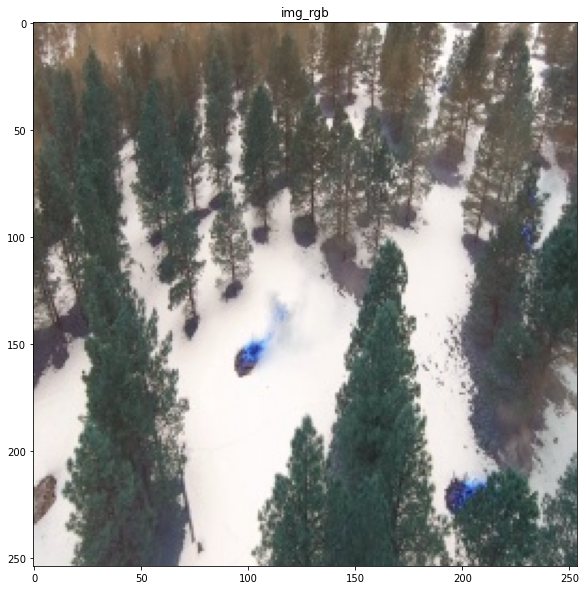

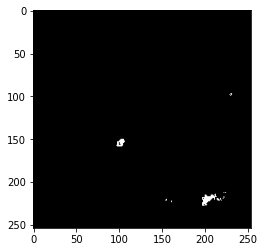

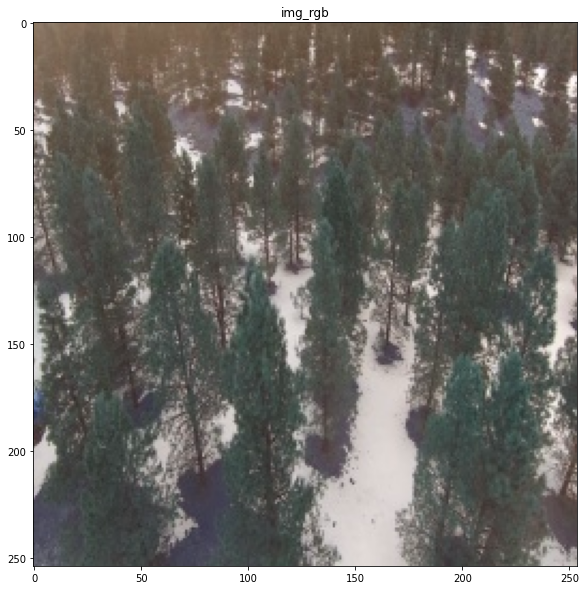

(1, 2295)

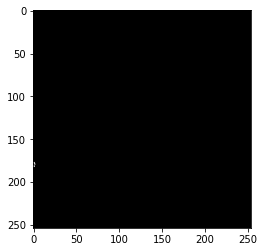

In [5]:
hsv2gray(test_dir+"Fire/resized_test_fire_frame1236.jpg", True)
hsv2gray(test_dir+"No_Fire/resized_test_nofire_frame1126.jpg", True)

In [6]:
df = pd.DataFrame({"filename": train_fire})
df['label']  = -1
df['sum']  = -1

In [8]:
pbar1 = tqdm.tqdm(train_fire)
for filename in pbar1:
    l, s = hsv2gray(train_dir+"Fire/"+filename)
    df.loc[df['filename'] == filename, 'label'] = l 
    df.loc[df['filename'] == filename, 'pixsum'] = s
    pbar1.update(1)
pbar1.close()

100%|███████████████████████████████████████| 25018/25018 [12:57<00:00, 32.18it/s]


In [9]:
df_n = pd.DataFrame({"filename": train_no_fire})
df_n['label']  = -1
df_n['pixsum']  = -1

resized_frame11330.jpg


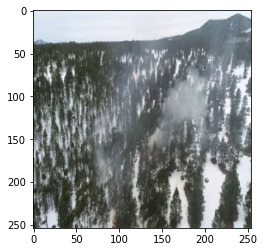

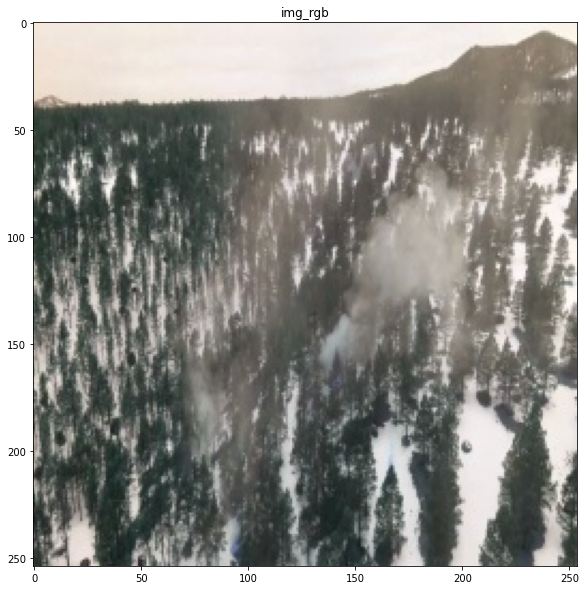

0 0


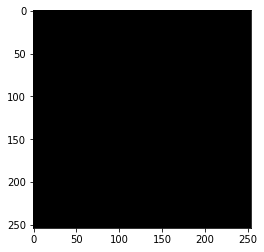

In [16]:
miss_fire = df.loc[df['label'] == 0, 'filename']
miss_fire = miss_fire.reset_index(drop=True)
if miss_fire.size:
    print(miss_fire[0])
    abc = plt.imread(train_dir+"Fire/"+miss_fire[0])
    plt.imshow(abc)
    l, s = hsv2gray(train_dir+"Fire/"+miss_fire[0], True)
    print(l, s)

In [11]:
pbar2 = tqdm.tqdm(train_no_fire)
for filename in pbar2:
    l , s = hsv2gray(train_dir+"No_Fire/"+filename)
    df_n.loc[df_n['filename'] == filename, 'label'] = l
    df_n.loc[df_n['filename'] == filename, 'pixsum'] = s
    pbar2.update(1)
pbar2.close()

100%|███████████████████████████████████████| 14357/14357 [07:22<00:00, 32.47it/s]


lake_resized_lake_frame10155.jpg


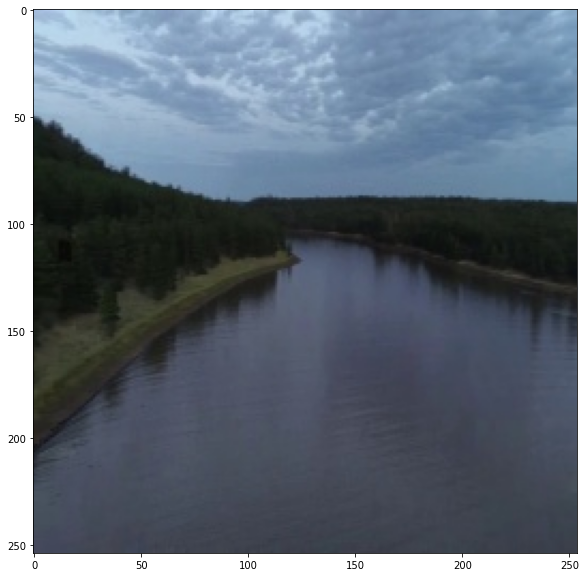

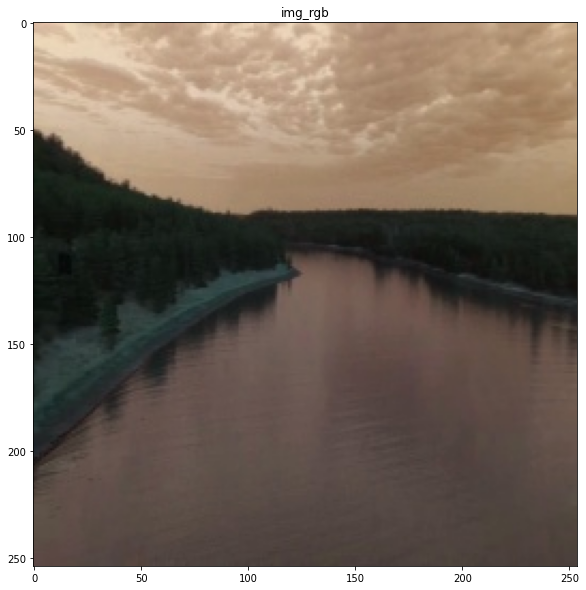

1 510


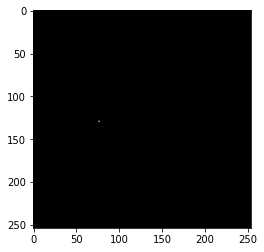

In [12]:
miss_no_fire = df_n.loc[df_n['label'] == 1, 'filename']
miss_no_fire = miss_no_fire.reset_index(drop=True)
if miss_no_fire.size:
    print(miss_no_fire[0])
    img_name = miss_no_fire[0]
    img = plt.imread(train_dir+"No_Fire/"+img_name)
    plt.figure(figsize=(15,10))
    plt.imshow(img)
    l, s = hsv2gray(train_dir+"No_Fire/"+img_name, True)
    print(l, s)

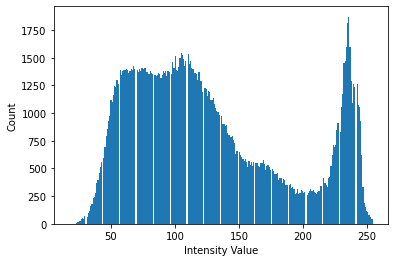

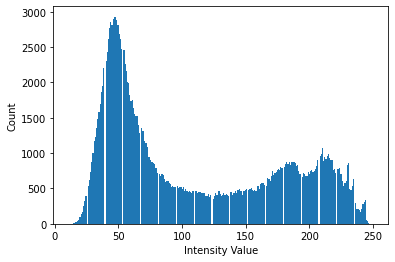

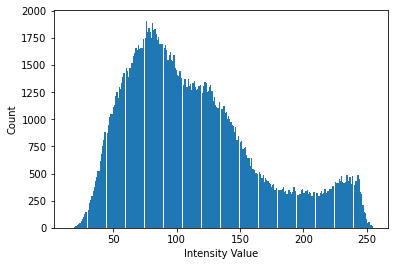

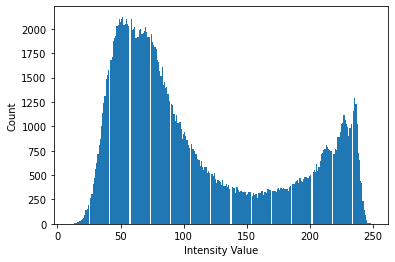

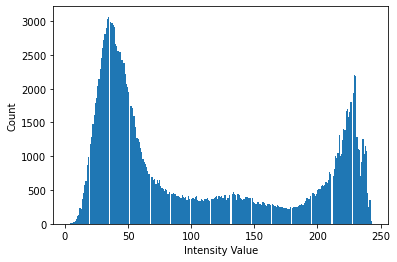

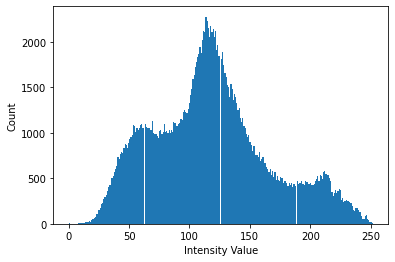

In [20]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(train_dir+"Fire/"+miss_fire[0])
plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Count') 
plt.show()

for i in range(5):
    image = io.imread(train_dir+"Fire/"+train_fire[np.random.choice(range(7000),1,replace=False)[0]])
    plt.hist(image.ravel(), bins = 256)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count') 
    plt.show()

In [13]:
print("Misclassified Fire\t", (df['label'].value_counts()[0]/5137)*100)

Misclassified Fire	 32.6844461748102


In [14]:
print("Misclassified NO Fire\t", (df_n['label'].value_counts()[1]/3480)*100)

Misclassified NO Fire	 37.1551724137931


In [15]:
print("Accuracy\t\t",100 - ((df['label'].value_counts()[0]+df_n['label'].value_counts()[1])/(5137+3480))*100)

Accuracy		 65.51003829639086


In [ ]:
# Misclassified Fire	 27.681526182596844
# Misclassified NO Fire	 3.1609195402298855
# Accuracy		 82.22119066960659

In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(data=df, x=df.index, y = 'pixsum')
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
sns.lineplot(data=df_n, x=df_n.index, y = 'pixsum')
plt.ticklabel_format(style='plain', axis='y')